# simple_rnnlm.py

In [8]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
#from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()


# train.py

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.40
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 388.67
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 269.74
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 221.38
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 211.50
| 에폭 6 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 210.37
| 에폭 7 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.75
| 에폭 8 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.22
| 에폭 9 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 195.44
| 에폭 10 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 191.58
| 에폭 11 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.02
| 에폭 12 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 190.21
| 에폭 13 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.58
| 에폭 14 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.42
| 에폭 15 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.22
| 에폭 16 |  반복 1 / 19 | 시간 5[s] | 퍼플렉서티 191.49
| 에폭 17 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 189.51
| 에폭 18 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 185.56
| 에폭 19 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 181.39
| 에폭 20 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 182.44
| 에폭 21 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 179.45
| 에폭 22 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 178.

/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

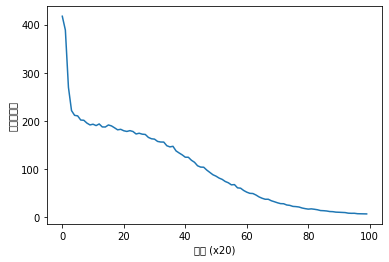

In [9]:
# coding: utf-8
import sys
sys.path.append('..')
#from common.optimizer import SGD
#from common.trainer import RnnlmTrainer
from dataset import ptb
#from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


In [10]:
"""
| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.40
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 388.67
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 269.74
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 221.38
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 211.50
| 에폭 6 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 210.37
| 에폭 7 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.75
| 에폭 8 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.22
| 에폭 9 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 195.44
| 에폭 10 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 191.58
| 에폭 11 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.02
| 에폭 12 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 190.21
| 에폭 13 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.58
| 에폭 14 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.42
| 에폭 15 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.22
| 에폭 16 |  반복 1 / 19 | 시간 5[s] | 퍼플렉서티 191.49
| 에폭 17 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 189.51
| 에폭 18 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 185.56
| 에폭 19 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 181.39
| 에폭 20 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 182.44
| 에폭 21 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 179.45
| 에폭 22 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 178.03
| 에폭 23 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 179.69
| 에폭 24 |  반복 1 / 19 | 시간 8[s] | 퍼플렉서티 177.88
| 에폭 25 |  반복 1 / 19 | 시간 8[s] | 퍼플렉서티 172.77
| 에폭 26 |  반복 1 / 19 | 시간 8[s] | 퍼플렉서티 174.31
| 에폭 27 |  반복 1 / 19 | 시간 8[s] | 퍼플렉서티 172.37
| 에폭 28 |  반복 1 / 19 | 시간 9[s] | 퍼플렉서티 171.74
| 에폭 29 |  반복 1 / 19 | 시간 9[s] | 퍼플렉서티 165.65
| 에폭 30 |  반복 1 / 19 | 시간 9[s] | 퍼플렉서티 162.83
| 에폭 31 |  반복 1 / 19 | 시간 10[s] | 퍼플렉서티 162.01
| 에폭 32 |  반복 1 / 19 | 시간 10[s] | 퍼플렉서티 157.29
| 에폭 33 |  반복 1 / 19 | 시간 10[s] | 퍼플렉서티 156.05
| 에폭 34 |  반복 1 / 19 | 시간 10[s] | 퍼플렉서티 155.94
| 에폭 35 |  반복 1 / 19 | 시간 11[s] | 퍼플렉서티 148.33
| 에폭 36 |  반복 1 / 19 | 시간 11[s] | 퍼플렉서티 145.93
| 에폭 37 |  반복 1 / 19 | 시간 11[s] | 퍼플렉서티 147.12
| 에폭 38 |  반복 1 / 19 | 시간 12[s] | 퍼플렉서티 137.58
| 에폭 39 |  반복 1 / 19 | 시간 12[s] | 퍼플렉서티 133.29
| 에폭 40 |  반복 1 / 19 | 시간 12[s] | 퍼플렉서티 129.35
| 에폭 41 |  반복 1 / 19 | 시간 12[s] | 퍼플렉서티 124.51
| 에폭 42 |  반복 1 / 19 | 시간 13[s] | 퍼플렉서티 124.36
| 에폭 43 |  반복 1 / 19 | 시간 13[s] | 퍼플렉서티 118.16
| 에폭 44 |  반복 1 / 19 | 시간 13[s] | 퍼플렉서티 113.97
| 에폭 45 |  반복 1 / 19 | 시간 14[s] | 퍼플렉서티 106.71
| 에폭 46 |  반복 1 / 19 | 시간 14[s] | 퍼플렉서티 103.94
| 에폭 47 |  반복 1 / 19 | 시간 14[s] | 퍼플렉서티 103.66
| 에폭 48 |  반복 1 / 19 | 시간 14[s] | 퍼플렉서티 97.71
| 에폭 49 |  반복 1 / 19 | 시간 15[s] | 퍼플렉서티 92.86
| 에폭 50 |  반복 1 / 19 | 시간 15[s] | 퍼플렉서티 88.03
| 에폭 51 |  반복 1 / 19 | 시간 15[s] | 퍼플렉서티 85.11
| 에폭 52 |  반복 1 / 19 | 시간 15[s] | 퍼플렉서티 81.13
| 에폭 53 |  반복 1 / 19 | 시간 15[s] | 퍼플렉서티 78.45
| 에폭 54 |  반복 1 / 19 | 시간 16[s] | 퍼플렉서티 74.04
| 에폭 55 |  반복 1 / 19 | 시간 16[s] | 퍼플렉서티 71.39
| 에폭 56 |  반복 1 / 19 | 시간 16[s] | 퍼플렉서티 67.06
| 에폭 57 |  반복 1 / 19 | 시간 16[s] | 퍼플렉서티 67.58
| 에폭 58 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 60.83
| 에폭 59 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 60.12
| 에폭 60 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 55.34
| 에폭 61 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 51.87
| 에폭 62 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 49.43
| 에폭 63 |  반복 1 / 19 | 시간 17[s] | 퍼플렉서티 49.02
| 에폭 64 |  반복 1 / 19 | 시간 18[s] | 퍼플렉서티 45.92
| 에폭 65 |  반복 1 / 19 | 시간 18[s] | 퍼플렉서티 41.99
| 에폭 66 |  반복 1 / 19 | 시간 18[s] | 퍼플렉서티 39.18
| 에폭 67 |  반복 1 / 19 | 시간 19[s] | 퍼플렉서티 37.11
| 에폭 68 |  반복 1 / 19 | 시간 19[s] | 퍼플렉서티 37.12
| 에폭 69 |  반복 1 / 19 | 시간 19[s] | 퍼플렉서티 34.00
| 에폭 70 |  반복 1 / 19 | 시간 19[s] | 퍼플렉서티 31.95
| 에폭 71 |  반복 1 / 19 | 시간 20[s] | 퍼플렉서티 29.78
| 에폭 72 |  반복 1 / 19 | 시간 21[s] | 퍼플렉서티 28.03
| 에폭 73 |  반복 1 / 19 | 시간 22[s] | 퍼플렉서티 27.81
| 에폭 74 |  반복 1 / 19 | 시간 23[s] | 퍼플렉서티 25.21
| 에폭 75 |  반복 1 / 19 | 시간 24[s] | 퍼플렉서티 24.42
| 에폭 76 |  반복 1 / 19 | 시간 25[s] | 퍼플렉서티 22.28
| 에폭 77 |  반복 1 / 19 | 시간 25[s] | 퍼플렉서티 21.84
| 에폭 78 |  반복 1 / 19 | 시간 27[s] | 퍼플렉서티 20.99
| 에폭 79 |  반복 1 / 19 | 시간 27[s] | 퍼플렉서티 18.94
| 에폭 80 |  반복 1 / 19 | 시간 27[s] | 퍼플렉서티 17.64
| 에폭 81 |  반복 1 / 19 | 시간 27[s] | 퍼플렉서티 16.60
| 에폭 82 |  반복 1 / 19 | 시간 28[s] | 퍼플렉서티 17.15
| 에폭 83 |  반복 1 / 19 | 시간 29[s] | 퍼플렉서티 16.31
| 에폭 84 |  반복 1 / 19 | 시간 29[s] | 퍼플렉서티 15.28
| 에폭 85 |  반복 1 / 19 | 시간 29[s] | 퍼플렉서티 13.64
| 에폭 86 |  반복 1 / 19 | 시간 29[s] | 퍼플렉서티 13.32
| 에폭 87 |  반복 1 / 19 | 시간 30[s] | 퍼플렉서티 12.73
| 에폭 88 |  반복 1 / 19 | 시간 30[s] | 퍼플렉서티 11.60
| 에폭 89 |  반복 1 / 19 | 시간 30[s] | 퍼플렉서티 11.32
| 에폭 90 |  반복 1 / 19 | 시간 31[s] | 퍼플렉서티 10.35
| 에폭 91 |  반복 1 / 19 | 시간 31[s] | 퍼플렉서티 10.10
| 에폭 92 |  반복 1 / 19 | 시간 32[s] | 퍼플렉서티 9.75
| 에폭 93 |  반복 1 / 19 | 시간 32[s] | 퍼플렉서티 9.44
| 에폭 94 |  반복 1 / 19 | 시간 32[s] | 퍼플렉서티 8.23
| 에폭 95 |  반복 1 / 19 | 시간 32[s] | 퍼플렉서티 7.90
| 에폭 96 |  반복 1 / 19 | 시간 33[s] | 퍼플렉서티 7.98
| 에폭 97 |  반복 1 / 19 | 시간 33[s] | 퍼플렉서티 7.10
| 에폭 98 |  반복 1 / 19 | 시간 33[s] | 퍼플렉서티 6.94
| 에폭 99 |  반복 1 / 19 | 시간 33[s] | 퍼플렉서티 6.79
| 에폭 100 |  반복 1 / 19 | 시간 34[s] | 퍼플렉서티 6.65
"""

'\n| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.40\n| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 388.67\n| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 269.74\n| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 221.38\n| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 211.50\n| 에폭 6 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 210.37\n| 에폭 7 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.75\n| 에폭 8 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.22\n| 에폭 9 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 195.44\n| 에폭 10 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 191.58\n| 에폭 11 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.02\n| 에폭 12 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 190.21\n| 에폭 13 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 193.58\n| 에폭 14 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.42\n| 에폭 15 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 187.22\n| 에폭 16 |  반복 1 / 19 | 시간 5[s] | 퍼플렉서티 191.49\n| 에폭 17 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 189.51\n| 에폭 18 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 185.56\n| 에폭 19 |  반복 1 / 19 | 시간 6[s] | 퍼플렉서티 181.39\n| 에폭 20 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 182.44\n| 에폭 21 |  반복 1 / 19 | 시간 7[s] | 퍼플렉서티 179.45\n| 에폭 22 |  반복 1 / 1

# train_custom_loop.py

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 392.73
| 에폭 2 | 퍼플렉서티 272.01
| 에폭 3 | 퍼플렉서티 229.42
| 에폭 4 | 퍼플렉서티 218.85
| 에폭 5 | 퍼플렉서티 207.97
| 에폭 6 | 퍼플렉서티 204.74
| 에폭 7 | 퍼플렉서티 200.02
| 에폭 8 | 퍼플렉서티 197.43
| 에폭 9 | 퍼플렉서티 192.05
| 에폭 10 | 퍼플렉서티 192.27
| 에폭 11 | 퍼플렉서티 189.15
| 에폭 12 | 퍼플렉서티 192.33
| 에폭 13 | 퍼플렉서티 189.11
| 에폭 14 | 퍼플렉서티 189.45
| 에폭 15 | 퍼플렉서티 188.09
| 에폭 16 | 퍼플렉서티 184.72
| 에폭 17 | 퍼플렉서티 183.09
| 에폭 18 | 퍼플렉서티 180.70
| 에폭 19 | 퍼플렉서티 181.07
| 에폭 20 | 퍼플렉서티 183.36
| 에폭 21 | 퍼플렉서티 180.19
| 에폭 22 | 퍼플렉서티 175.71
| 에폭 23 | 퍼플렉서티 174.92
| 에폭 24 | 퍼플렉서티 173.96
| 에폭 25 | 퍼플렉서티 172.74
| 에폭 26 | 퍼플렉서티 170.59
| 에폭 27 | 퍼플렉서티 166.03
| 에폭 28 | 퍼플렉서티 163.82
| 에폭 29 | 퍼플렉서티 163.78
| 에폭 30 | 퍼플렉서티 155.20
| 에폭 31 | 퍼플렉서티 157.31
| 에폭 32 | 퍼플렉서티 152.22
| 에폭 33 | 퍼플렉서티 150.69
| 에폭 34 | 퍼플렉서티 144.60
| 에폭 35 | 퍼플렉서티 143.27
| 에폭 36 | 퍼플렉서티 136.49
| 에폭 37 | 퍼플렉서티 132.10
| 에폭 38 | 퍼플렉서티 127.76
| 에폭 39 | 퍼플렉서티 121.69
| 에폭 40 | 퍼플렉서티 118.90
| 에폭 41 | 퍼플렉서티 117.72
| 에폭 42 | 퍼플렉서티 111.00
| 에폭 43 | 퍼플렉서티 106

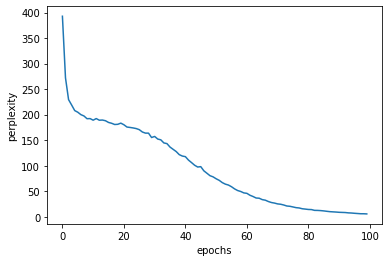

In [13]:
# coding: utf-8
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
#from common.optimizer import SGD
from dataset import ptb
#from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [14]:
"""
말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 392.73
| 에폭 2 | 퍼플렉서티 272.01
| 에폭 3 | 퍼플렉서티 229.42
| 에폭 4 | 퍼플렉서티 218.85
| 에폭 5 | 퍼플렉서티 207.97
| 에폭 6 | 퍼플렉서티 204.74
| 에폭 7 | 퍼플렉서티 200.02
| 에폭 8 | 퍼플렉서티 197.43
| 에폭 9 | 퍼플렉서티 192.05
| 에폭 10 | 퍼플렉서티 192.27
| 에폭 11 | 퍼플렉서티 189.15
| 에폭 12 | 퍼플렉서티 192.33
| 에폭 13 | 퍼플렉서티 189.11
| 에폭 14 | 퍼플렉서티 189.45
| 에폭 15 | 퍼플렉서티 188.09
| 에폭 16 | 퍼플렉서티 184.72
| 에폭 17 | 퍼플렉서티 183.09
| 에폭 18 | 퍼플렉서티 180.70
| 에폭 19 | 퍼플렉서티 181.07
| 에폭 20 | 퍼플렉서티 183.36
| 에폭 21 | 퍼플렉서티 180.19
| 에폭 22 | 퍼플렉서티 175.71
| 에폭 23 | 퍼플렉서티 174.92
| 에폭 24 | 퍼플렉서티 173.96
| 에폭 25 | 퍼플렉서티 172.74
| 에폭 26 | 퍼플렉서티 170.59
| 에폭 27 | 퍼플렉서티 166.03
| 에폭 28 | 퍼플렉서티 163.82
| 에폭 29 | 퍼플렉서티 163.78
| 에폭 30 | 퍼플렉서티 155.20
| 에폭 31 | 퍼플렉서티 157.31
| 에폭 32 | 퍼플렉서티 152.22
| 에폭 33 | 퍼플렉서티 150.69
| 에폭 34 | 퍼플렉서티 144.60
| 에폭 35 | 퍼플렉서티 143.27
| 에폭 36 | 퍼플렉서티 136.49
| 에폭 37 | 퍼플렉서티 132.10
| 에폭 38 | 퍼플렉서티 127.76
| 에폭 39 | 퍼플렉서티 121.69
| 에폭 40 | 퍼플렉서티 118.90
| 에폭 41 | 퍼플렉서티 117.72
| 에폭 42 | 퍼플렉서티 111.00
| 에폭 43 | 퍼플렉서티 106.07
| 에폭 44 | 퍼플렉서티 100.92
| 에폭 45 | 퍼플렉서티 97.40
| 에폭 46 | 퍼플렉서티 98.17
| 에폭 47 | 퍼플렉서티 90.00
| 에폭 48 | 퍼플렉서티 85.24
| 에폭 49 | 퍼플렉서티 80.44
| 에폭 50 | 퍼플렉서티 78.16
| 에폭 51 | 퍼플렉서티 74.41
| 에폭 52 | 퍼플렉서티 71.32
| 에폭 53 | 퍼플렉서티 66.89
| 에폭 54 | 퍼플렉서티 63.88
| 에폭 55 | 퍼플렉서티 62.11
| 에폭 56 | 퍼플렉서티 58.80
| 에폭 57 | 퍼플렉서티 54.57
| 에폭 58 | 퍼플렉서티 51.36
| 에폭 59 | 퍼플렉서티 49.48
| 에폭 60 | 퍼플렉서티 46.73
| 에폭 61 | 퍼플렉서티 45.87
| 에폭 62 | 퍼플렉서티 42.12
| 에폭 63 | 퍼플렉서티 39.67
| 에폭 64 | 퍼플렉서티 36.73
| 에폭 65 | 퍼플렉서티 36.31
| 에폭 66 | 퍼플렉서티 33.56
| 에폭 67 | 퍼플렉서티 32.45
| 에폭 68 | 퍼플렉서티 29.80
| 에폭 69 | 퍼플렉서티 27.86
| 에폭 70 | 퍼플렉서티 26.77
| 에폭 71 | 퍼플렉서티 25.17
| 에폭 72 | 퍼플렉서티 24.48
| 에폭 73 | 퍼플렉서티 23.01
| 에폭 74 | 퍼플렉서티 21.05
| 에폭 75 | 퍼플렉서티 20.48
| 에폭 76 | 퍼플렉서티 19.20
| 에폭 77 | 퍼플렉서티 17.84
| 에폭 78 | 퍼플렉서티 17.24
| 에폭 79 | 퍼플렉서티 15.69
| 에폭 80 | 퍼플렉서티 15.01
| 에폭 81 | 퍼플렉서티 14.29
| 에폭 82 | 퍼플렉서티 14.06
| 에폭 83 | 퍼플렉서티 12.53
| 에폭 84 | 퍼플렉서티 12.42
| 에폭 85 | 퍼플렉서티 12.05
| 에폭 86 | 퍼플렉서티 11.45
| 에폭 87 | 퍼플렉서티 10.68
| 에폭 88 | 퍼플렉서티 9.98
| 에폭 89 | 퍼플렉서티 9.60
| 에폭 90 | 퍼플렉서티 9.22
| 에폭 91 | 퍼플렉서티 8.73
| 에폭 92 | 퍼플렉서티 8.49
| 에폭 93 | 퍼플렉서티 8.27
| 에폭 94 | 퍼플렉서티 7.63
| 에폭 95 | 퍼플렉서티 7.32
| 에폭 96 | 퍼플렉서티 6.79
| 에폭 97 | 퍼플렉서티 6.35
| 에폭 98 | 퍼플렉서티 5.91
| 에폭 99 | 퍼플렉서티 5.87
| 에폭 100 | 퍼플렉서티 5.56
"""

'\n말뭉치 크기: 1000, 어휘 수: 418\n| 에폭 1 | 퍼플렉서티 392.73\n| 에폭 2 | 퍼플렉서티 272.01\n| 에폭 3 | 퍼플렉서티 229.42\n| 에폭 4 | 퍼플렉서티 218.85\n| 에폭 5 | 퍼플렉서티 207.97\n| 에폭 6 | 퍼플렉서티 204.74\n| 에폭 7 | 퍼플렉서티 200.02\n| 에폭 8 | 퍼플렉서티 197.43\n| 에폭 9 | 퍼플렉서티 192.05\n| 에폭 10 | 퍼플렉서티 192.27\n| 에폭 11 | 퍼플렉서티 189.15\n| 에폭 12 | 퍼플렉서티 192.33\n| 에폭 13 | 퍼플렉서티 189.11\n| 에폭 14 | 퍼플렉서티 189.45\n| 에폭 15 | 퍼플렉서티 188.09\n| 에폭 16 | 퍼플렉서티 184.72\n| 에폭 17 | 퍼플렉서티 183.09\n| 에폭 18 | 퍼플렉서티 180.70\n| 에폭 19 | 퍼플렉서티 181.07\n| 에폭 20 | 퍼플렉서티 183.36\n| 에폭 21 | 퍼플렉서티 180.19\n| 에폭 22 | 퍼플렉서티 175.71\n| 에폭 23 | 퍼플렉서티 174.92\n| 에폭 24 | 퍼플렉서티 173.96\n| 에폭 25 | 퍼플렉서티 172.74\n| 에폭 26 | 퍼플렉서티 170.59\n| 에폭 27 | 퍼플렉서티 166.03\n| 에폭 28 | 퍼플렉서티 163.82\n| 에폭 29 | 퍼플렉서티 163.78\n| 에폭 30 | 퍼플렉서티 155.20\n| 에폭 31 | 퍼플렉서티 157.31\n| 에폭 32 | 퍼플렉서티 152.22\n| 에폭 33 | 퍼플렉서티 150.69\n| 에폭 34 | 퍼플렉서티 144.60\n| 에폭 35 | 퍼플렉서티 143.27\n| 에폭 36 | 퍼플렉서티 136.49\n| 에폭 37 | 퍼플렉서티 132.10\n| 에폭 38 | 퍼플렉서티 127.76\n| 에폭 39 | 퍼플렉서티 121.69\n| 에폭 40 | 퍼플렉서티 118.90\n| 에폭 41 | 퍼플렉서티 117.7

# common_all

In [7]:
#================================================================================#
#base_model.py
#================================================================================#


# coding: utf-8
import sys
sys.path.append('..')
import os
import pickle
#from common.np import *
#from common.util import to_gpu, to_cpu


class BaseModel:
    def __init__(self):
        self.params, self.grads = None, None

    def forward(self, *args):
        raise NotImplementedError

    def backward(self, *args):
        raise NotImplementedError

    def save_params(self, file_name=None):
        if file_name is None:
            file_name = self.__class__.__name__ + '.pkl'

        params = [p.astype(np.float16) for p in self.params]
        if GPU:
            params = [to_cpu(p) for p in params]

        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name=None):
        if file_name is None:
            file_name = self.__class__.__name__ + '.pkl'

        if '/' in file_name:
            file_name = file_name.replace('/', os.sep)

        if not os.path.exists(file_name):
            raise IOError('No file: ' + file_name)

        with open(file_name, 'rb') as f:
            params = pickle.load(f)

        params = [p.astype('f') for p in params]
        if GPU:
            params = [to_gpu(p) for p in params]

        for i, param in enumerate(self.params):
            param[...] = params[i]


#================================================================================#
#config.py
#================================================================================#
# coding: utf-8

GPU = False

#================================================================================#
#functions.py
#================================================================================#
# coding: utf-8
#from common.np import *


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


#================================================================================#
#layers.py
#================================================================================#

# coding: utf-8
#from common.np import *  # import numpy as np
#from common.config import GPU
#from common.functions import softmax, cross_entropy_error


class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#================================================================================#
#layers.py
#================================================================================#

class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoid의 출력
        self.t = None  # 정답 데이터

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx


class Dropout:
    '''
    http://arxiv.org/abs/1207.0580
    '''
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None


#================================================================================#
#np.py
#================================================================================#

# coding: utf-8
#from common.config import GPU


if GPU:
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)
    np.add.at = np.scatter_add

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else:
    import numpy as np


#================================================================================#
#optimizer.py
#================================================================================#
# coding: utf-8
import sys
sys.path.append('..')
#from common.np import *


class SGD:
    '''
    확률적 경사하강법(Stochastic Gradient Descent)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


class Momentum:
    '''
    모멘텀 SGG(Momentum SGD)
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]


class Nesterov:
    '''
    네스테로프 가속 경사(NAG; Nesterov's Accelerated Gradient) (http://arxiv.org/abs/1212.0901)
    '네스테로프 모멘텀 최적화'라고도 한다.
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]


class AdaGrad:
    '''
    AdaGrad
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class RMSprop:
    '''
    RMSprop
    '''
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

#================================================================================#
#time_layers.py
#================================================================================#
# coding: utf-8
#from common.np import *  # import numpy as np (or import cupy as np)
#from common.layers import *
#from common.functions import sigmoid


class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.dot(h_prev, Wh) + np.dot(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache

        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.dot(h_prev.T, dt)
        dh_prev = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev


class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class LSTM:
    def __init__(self, Wx, Wh, b):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(4개분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가장추 매개변수(4개분의 가중치가 담겨 있음)
        b: 편향（4개분의 편향이 담겨 있음）
        '''
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev


class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None


class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None


class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx


class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_labelㅇㅔ 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx


class TimeDropout:
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None
        self.train_flg = True

    def forward(self, xs):
        if self.train_flg:
            flg = np.random.rand(*xs.shape) > self.dropout_ratio
            scale = 1 / (1.0 - self.dropout_ratio)
            self.mask = flg.astype(np.float32) * scale

            return xs * self.mask
        else:
            return xs

    def backward(self, dout):
        return dout * self.mask


class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)
        o2 = self.backward_lstm.forward(xs[:, ::-1])
        o2 = o2[:, ::-1]

        out = np.concatenate((o1, o2), axis=2)
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)
        do2 = do2[:, ::-1]
        dxs2 = self.backward_lstm.backward(do2)
        dxs2 = dxs2[:, ::-1]
        dxs = dxs1 + dxs2
        return dxs

# ====================================================================== #
# 이 아래의 계층들은 책에서 설명하지 않았거나
# 처리 속도보다는 쉽게 이해할 수 있도록 구현했습니다.
#
# TimeSigmoidWithLoss: 시계열 데이터용 시그모이드 + 손실 계층
# GRU: GRU 계층
# TimeGRU: 시계열 데이터용 GRU 계층
# BiTimeLSTM: 양방향 LSTM 계층
# Simple_TimeSoftmaxWithLoss：간단한 TimeSoftmaxWithLoss 계층의 구현
# Simple_TimeAffine: 간단한 TimeAffine 계층의 구현
# ====================================================================== #


class TimeSigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.xs_shape = None
        self.layers = None

    def forward(self, xs, ts):
        N, T = xs.shape
        self.xs_shape = xs.shape

        self.layers = []
        loss = 0

        for t in range(T):
            layer = SigmoidWithLoss()
            loss += layer.forward(xs[:, t], ts[:, t])
            self.layers.append(layer)

        return loss / T

    def backward(self, dout=1):
        N, T = self.xs_shape
        dxs = np.empty(self.xs_shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t] = layer.backward(dout)

        return dxs


class GRU:
    def __init__(self, Wx, Wh):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        '''
        self.Wx, self.Wh = Wx, Wh
        self.dWx, self.dWh = None, None
        self.cache = None

    def forward(self, x, h_prev):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]

        z = sigmoid(np.dot(x, Wxz) + np.dot(h_prev, Whz))
        r = sigmoid(np.dot(x, Wxr) + np.dot(h_prev, Whr))
        h_hat = np.tanh(np.dot(x, Wx) + np.dot(r*h_prev, Wh))
        h_next = (1-z) * h_prev + z * h_hat

        self.cache = (x, h_prev, z, r, h_hat)

        return h_next

    def backward(self, dh_next):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]
        x, h_prev, z, r, h_hat = self.cache

        dh_hat =dh_next * z
        dh_prev = dh_next * (1-z)

        # tanh
        dt = dh_hat * (1 - h_hat ** 2)
        dWh = np.dot((r * h_prev).T, dt)
        dhr = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)
        dh_prev += r * dhr

        # update gate(z)
        dz = dh_next * h_hat - dh_next * h_prev
        dt = dz * z * (1-z)
        dWhz = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whz.T)
        dWxz = np.dot(x.T, dt)
        dx += np.dot(dt, Wxz.T)

        # rest gate(r)
        dr = dhr * h_prev
        dt = dr * r * (1-r)
        dWhr = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whr.T)
        dWxr = np.dot(x.T, dt)
        dx += np.dot(dt, Wxr.T)

        self.dWx = np.hstack((dWxz, dWxr, dWx))
        self.dWh = np.hstack((dWhz, dWhr, dWh))

        return dx, dh_prev


class TimeGRU:
    def __init__(self, Wx, Wh, stateful=False):
        self.Wx, self.Wh = Wx, Wh
        selfdWx, self.dWh = None, None
        self.layers = None
        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        N, T, D = xs.shape
        H, H3 = self.Wh.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = GRU(self.Wx, self.Wh)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        N, T, H = dhs.shape
        D = self.Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        self.dWx, self.dWh = 0, 0

        dh = 0
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)

            dxs[:, t, :] = dx
            self.dWx += layer.dWx
            self.dWh += layer.dWh

        self.dh = dh
        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class Simple_TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None

    def forward(self, xs, ts):
        N, T, V = xs.shape
        layers = []
        loss = 0

        for t in range(T):
            layer = SoftmaxWithLoss()
            loss += layer.forward(xs[:, t, :], ts[:, t])
            layers.append(layer)
        loss /= T

        self.cache = (layers, xs)
        return loss

    def backward(self, dout=1):
        layers, xs = self.cache
        N, T, V = xs.shape
        dxs = np.empty(xs.shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = layers[t]
            dxs[:, t, :] = layer.backward(dout)

        return dxs


class Simple_TimeAffine:
    def __init__(self, W, b):
        self.W, self.b = W, b
        self.dW, self.db = None, None
        self.layers = None

    def forward(self, xs):
        N, T, D = xs.shape
        D, M = self.W.shape

        self.layers = []
        out = np.empty((N, T, M), dtype='f')
        for t in range(T):
            layer = Affine(self.W, self.b)
            out[:, t, :] = layer.forward(xs[:, t, :])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, M = dout.shape
        D, M = self.W.shape

        dxs = np.empty((N, T, D), dtype='f')
        self.dW, self.db = 0, 0
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t, :] = layer.backward(dout[:, t, :])

            self.dW += layer.dW
            self.db += layer.db

        return dxs

#================================================================================#
#trainer.py
#================================================================================#
# coding: utf-8
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
#from common.np import *  # import numpy as np
#from common.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()


class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads


#================================================================================#
#util.py
#================================================================================#

# coding: utf-8
import sys
sys.path.append('..')
import os
#from common.np import *


def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word


def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)


def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def convert_one_hot(corpus, vocab_size):
    '''원핫 표현으로 변환

    :param corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix


def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성

    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M


def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return:
    '''
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)


def to_cpu(x):
    import numpy
    if type(x) == numpy.ndarray:
        return x
    return np.asnumpy(x)


def to_gpu(x):
    import cupy
    if type(x) == cupy.ndarray:
        return x
    return cupy.asarray(x)


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


def eval_perplexity(model, corpus, batch_size=10, time_size=35):
    print('퍼플렉서티 평가 중 ...')
    corpus_size = len(corpus)
    total_loss, loss_cnt = 0, 0
    max_iters = (corpus_size - 1) // (batch_size * time_size)
    jump = (corpus_size - 1) // batch_size

    for iters in range(max_iters):
        xs = np.zeros((batch_size, time_size), dtype=np.int32)
        ts = np.zeros((batch_size, time_size), dtype=np.int32)
        time_offset = iters * time_size
        offsets = [time_offset + (i * jump) for i in range(batch_size)]
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                xs[i, t] = corpus[(offset + t) % corpus_size]
                ts[i, t] = corpus[(offset + t + 1) % corpus_size]

        try:
            loss = model.forward(xs, ts, train_flg=False)
        except TypeError:
            loss = model.forward(xs, ts)
        total_loss += loss

        sys.stdout.write('\r%d / %d' % (iters, max_iters))
        sys.stdout.flush()

    print('')
    ppl = np.exp(total_loss / max_iters)
    return ppl


def eval_seq2seq(model, question, correct, id_to_char,
                 verbos=False, is_reverse=False):
    correct = correct.flatten()
    # 머릿글자
    start_id = correct[0]
    correct = correct[1:]
    guess = model.generate(question, start_id, len(correct))

    # 문자열로 변환
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])

    if verbos:
        if is_reverse:
            question = question[::-1]

        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print('Q', question)
        print('T', correct)

        is_windows = os.name == 'nt'

        if correct == guess:
            mark = colors['ok'] + '☑' + colors['close']
            if is_windows:
                mark = 'O'
            print(mark + ' ' + guess)
        else:
            mark = colors['fail'] + '☒' + colors['close']
            if is_windows:
                mark = 'X'
            print(mark + ' ' + guess)
        print('---')

    return 1 if guess == correct else 0


def analogy(a, b, c, word_to_id, id_to_word, word_matrix, top=5, answer=None):
    for word in (a, b, c):
        if word not in word_to_id:
            print('%s(을)를 찾을 수 없습니다.' % word)
            return

    print('\n[analogy] ' + a + ':' + b + ' = ' + c + ':?')
    a_vec, b_vec, c_vec = word_matrix[word_to_id[a]], word_matrix[word_to_id[b]], word_matrix[word_to_id[c]]
    query_vec = b_vec - a_vec + c_vec
    query_vec = normalize(query_vec)

    similarity = np.dot(word_matrix, query_vec)

    if answer is not None:
        print("==>" + answer + ":" + str(np.dot(word_matrix[word_to_id[answer]], query_vec)))

    count = 0
    for i in (-1 * similarity).argsort():
        if np.isnan(similarity[i]):
            continue
        if id_to_word[i] in (a, b, c):
            continue
        print(' {0}: {1}'.format(id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def normalize(x):
    if x.ndim == 2:
        s = np.sqrt((x * x).sum(1))
        x /= s.reshape((s.shape[0], 1))
    elif x.ndim == 1:
        s = np.sqrt((x * x).sum())
        x /= s
    return x

